In [1]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import time # para medir tiempos de ejecución
import kbhit
import random
# gráficos en el notebook
%matplotlib inline
SRATE = 44100 # Sample rate, para todo el programa

[-0.71967166  0.70466679 -0.56617379 ...  0.4667138   0.92963807
  0.36670914]
time: 0.016226530075073242
[-0.76198218  0.18580592 -0.15162865 ...  0.46200892  0.42120327
  0.37214889]
time: 0.21402978897094727


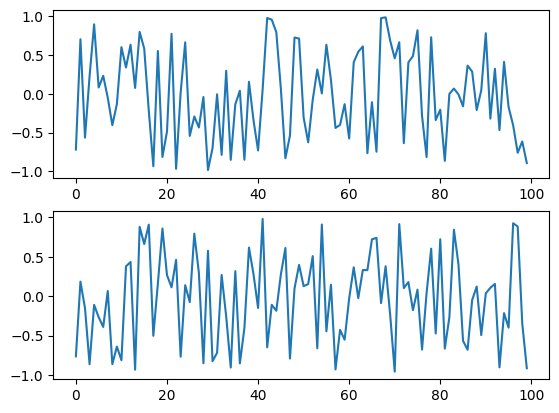

In [78]:
def noise1(dur):
    ns = np.empty([dur * SRATE])

    i = 0
    while i < ns.size:
        ns[i] = random.random() * random.choice([-1, 1])
        i += 1    

    return ns

def noise2(dur):
    ns = np.random.uniform(-1, 1, dur * SRATE)
    return ns

start = time.time()

ns = noise1(1)
print(ns)
print(f'time: {time.time() - start}')

start = time.time()
ns2 = noise2(1)
print(ns2)
print(f'time: {time.time() - start}')

fig, ax = plt.subplots(2,1)
ax[0].plot(ns[:100])
ax[1].plot(ns2[:100])

noise1 = ns * 0.2
noise2 = ns * 0.2

sd.play(noise2)

sd.wait()


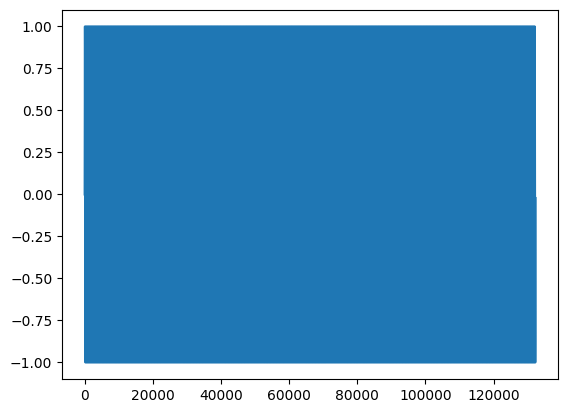

In [160]:
frec = 440
dur = 3
ns = np.arange(SRATE * dur)
a = np.sin(((ns * np.pi * 2) * frec) / (SRATE * dur))

plt.plot(ns, a)

a = a * 0.5

sd.play(a)

sd.wait()

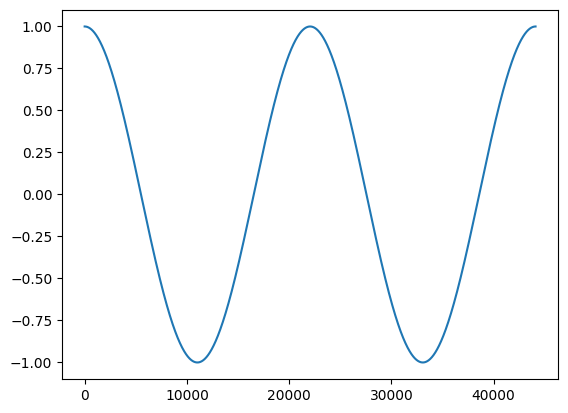

In [109]:
def osc(freq, dur=1, amp=1, phase=0):
    ns = np.arange(SRATE * dur)
    a = np.sin(((ns * np.pi * 2 * freq) /SRATE) + phase)
    a = a * amp

    return a

a = osc(2, 1, 1, np.pi / 2)

plt.plot(a)

sd.play(a)

sd.wait()


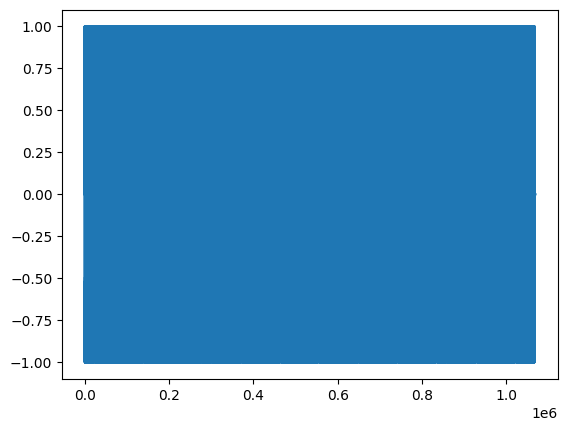

In [110]:
partitura = np.array([['G', 0.5], ['G', 0.5], ['A', 1], ['G', 1], ['c', 1], ['B', 2],
                      ['G', 0.5], ['G', 0.5], ['A', 1], ['G', 1], ['d', 1], ['c', 2],
                      ['G', 0.5], ['G', 0.5], ['g', 1], ['e', 1], ['c', 1], ['B', 1], ['A', 1],
                      ['f', 0.5], ['f', 0.5], ['e', 1], ['c', 1], ['d', 1], ['c', 1]])

def NotaFrecuencia(nota=''):

    frecuencia = 0
    notaAux = nota.upper()

    if notaAux == 'C':
        frecuencia = 523.251
    elif notaAux == 'D':
        frecuencia = 587.33
    elif notaAux == 'E':
        frecuencia = 659.255
    elif notaAux == 'F':
        frecuencia = 698.456
    elif notaAux == 'G':
        frecuencia = 783.991
    elif notaAux == 'A':
        frecuencia = 880
    elif notaAux == 'B':
        frecuencia = 987.767

    if nota == nota.lower():
        frecuencia = frecuencia * 2

    return frecuencia

def AddNota (partitura, nota, duracion):
    aux = osc(NotaFrecuencia(nota), duracion)
    sil = osc(0, 0.05)
    return np.concatenate((partitura, aux, sil), axis=None)


def CrearPartitura(tabla):
    sol = np.array([])

    for i in tabla:

       sol = AddNota(sol, i[0], i[1].astype(float))

    return sol


def UnirPartituras(partitura1, partitura2):
    return np.concatenate((partitura1, partitura2), axis=None)


sol = CrearPartitura(partitura)

plt.plot(sol)

sd.play(sol)

sd.wait()



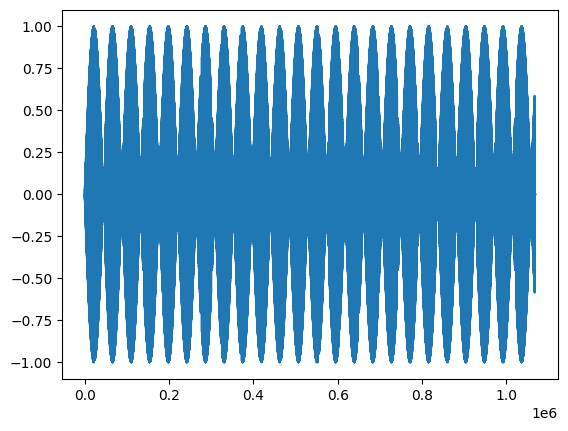

In [120]:
#Ejercicio 5

def modulador(signal, freq):

    dur = len(signal)/SRATE

    aux = osc(freq, dur)
    return signal * aux


aux = modulador(sol, 0.5)

plt.plot(aux)

sd.play(aux)

sd.wait()


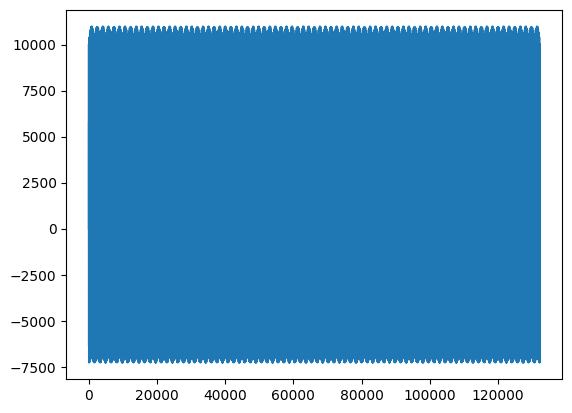

In [130]:
def harmOsc(f, amps, dur, amp):
    i = 0

    sol = osc(f * (i + 1), dur, amp)

    i += 1

    while i < len(amps):
        aux = osc(f, dur, amps[i])

        sol = sol + aux

        i += 1
        
    return sol

armonicos = np.arange(3000, 8000)

flauta = harmOsc(261, armonicos, 3, 1)

plt.plot(flauta)

sd.play(flauta)

sd.wait()